In [51]:
import getpass
import datetime
from datetime import date, timedelta, datetime, time
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.dates as mdates
import os
import csv
import pandas as pd

# import mplcursors

USER = getpass.getuser()

In [52]:
plt.rcParams['figure.figsize'] = [8, 5]
%matplotlib notebook

In [96]:
data_dir = pd.read_excel (r"temp_data.xlsx")

df = pd.DataFrame(data_dir)
dn = df.to_numpy()
exmatrix = np.matrix(dn)
                     
lm_1_rf_list = []
lm_1_zynq_list = []
lm_1_batt_list = []

for x in range(0,799):
    s1 = (datetime.strptime(exmatrix[x,2], '%m/%d/%Y %H:%M:%S').hour * 60 + datetime.strptime(exmatrix[x,2], '%m/%d/%Y %H:%M:%S').minute) * 60 + datetime.strptime(exmatrix[x,2], '%m/%d/%Y %H:%M:%S').second
    s2 = (datetime.strptime(exmatrix[(x+1),2], '%m/%d/%Y %H:%M:%S').hour * 60 + datetime.strptime(exmatrix[(x+1),2], '%m/%d/%Y %H:%M:%S').minute) * 60 + datetime.strptime(exmatrix[(x+1),2], '%m/%d/%Y %H:%M:%S').second
    dt = s2-s1
    
    down_point_rf = exmatrix[x,14]
    down_point_zynq = exmatrix[x,15]
    down_point_batt = exmatrix[x,16]

    up_point_rf = exmatrix[(x+1),14]
    up_point_zynq = exmatrix[(x+1),15]
    up_point_batt = exmatrix[(x+1),16]

    p_dif_rf = up_point_rf - down_point_rf
    p_dif_zynq = up_point_zynq - down_point_zynq
    p_dif_batt = up_point_batt - down_point_batt

    rf_int = p_dif_rf/dt
    zynq_int = p_dif_zynq/dt
    batt_int = p_dif_batt/dt
    
    upsample_array_rf = []
    upsample_array_zynq = []
    upsample_array_batt = []
    for y in range(0,dt):
        rf_inc = down_point_rf + y*rf_int
        zynq_inc = down_point_zynq + y*zynq_int
        batt_inc = down_point_batt + y*batt_int
        
        upsample_array_rf.append(rf_inc)
        upsample_array_zynq.append(zynq_inc)
        upsample_array_batt.append(batt_inc)
      
    lm_1_rf_list = lm_1_rf_list + upsample_array_rf
    lm_1_zynq_list = lm_1_zynq_list + upsample_array_zynq
    lm_1_batt_list = lm_1_batt_list + upsample_array_batt

lm_2_rf_list = []
lm_2_zynq_list = []
lm_2_batt_list = []

for x in range(0,1032):
    s1 = (datetime.strptime(exmatrix[x,3], '%m/%d/%Y %H:%M:%S').hour * 60 + datetime.strptime(exmatrix[x,3], '%m/%d/%Y %H:%M:%S').minute) * 60 + datetime.strptime(exmatrix[x,3], '%m/%d/%Y %H:%M:%S').second
    s2 = (datetime.strptime(exmatrix[(x+1),3], '%m/%d/%Y %H:%M:%S').hour * 60 + datetime.strptime(exmatrix[(x+1),3], '%m/%d/%Y %H:%M:%S').minute) * 60 + datetime.strptime(exmatrix[(x+1),3], '%m/%d/%Y %H:%M:%S').second
    dt = s2-s1
    
    down_point_rf = exmatrix[x,17]
    down_point_zynq = exmatrix[x,18]
    down_point_batt = exmatrix[x,19]

    up_point_rf = exmatrix[(x+1),17]
    up_point_zynq = exmatrix[(x+1),18]
    up_point_batt = exmatrix[(x+1),19]

    p_dif_rf = up_point_rf - down_point_rf
    p_dif_zynq = up_point_zynq - down_point_zynq
    p_dif_batt = up_point_batt - down_point_batt

    rf_int = p_dif_rf/dt
    zynq_int = p_dif_zynq/dt
    batt_int = p_dif_batt/dt
    
    upsample_array_rf = []
    upsample_array_zynq = []
    upsample_array_batt = []
    for y in range(0,dt):
        rf_inc = down_point_rf + y*rf_int
        zynq_inc = down_point_zynq + y*zynq_int
        batt_inc = down_point_batt + y*batt_int
        
        upsample_array_rf.append(rf_inc)
        upsample_array_zynq.append(zynq_inc)
        upsample_array_batt.append(batt_inc)
      
    lm_2_rf_list = lm_2_rf_list + upsample_array_rf
    lm_2_zynq_list = lm_2_zynq_list + upsample_array_zynq
    lm_2_batt_list = lm_2_batt_list + upsample_array_batt

   
lm_1_amb_in_list = []
lm_1_encl_list = []
lm_2_amb_in_list = []
lm_2_encl_list = []

for x in range(0,273):
    s1 = (datetime.strptime(exmatrix[x,1], '%m/%d/%Y %H:%M:%S').hour * 60 + datetime.strptime(exmatrix[x,1], '%m/%d/%Y %H:%M:%S').minute) * 60 + datetime.strptime(exmatrix[x,1], '%m/%d/%Y %H:%M:%S').second
    s2 = (datetime.strptime(exmatrix[(x+1),1], '%m/%d/%Y %H:%M:%S').hour * 60 + datetime.strptime(exmatrix[(x+1),1], '%m/%d/%Y %H:%M:%S').minute) * 60 + datetime.strptime(exmatrix[(x+1),1], '%m/%d/%Y %H:%M:%S').second
    dt = s2-s1
    
    down_point_rf = exmatrix[x,10]
    down_point_batt = exmatrix[x,11]
    down_point_amb_in = exmatrix[x,12]
    down_point_amb_out = exmatrix[x,13]

    up_point_rf = exmatrix[(x+1),10]
    up_point_batt = exmatrix[(x+1),11]
    up_point_amb_in = exmatrix[(x+1),12]
    up_point_amb_out = exmatrix[(x+1),13]

    p_dif_rf = up_point_rf - down_point_rf
    p_dif_batt = up_point_batt - down_point_batt
    p_dif_amb_in = up_point_amb_in - down_point_amb_in
    p_dif_amb_out = up_point_amb_out - down_point_amb_out

    rf_int = p_dif_rf/dt
    batt_int = p_dif_batt/dt
    amb_in_int = p_dif_amb_in/dt
    amb_out_int = p_dif_amb_out/dt

    upsample_array_rf = []
    upsample_array_batt = []
    upsample_array_amb_in = []
    upsample_array_amb_out = []
    for y in range(0,dt):
        rf_inc = down_point_rf + y*rf_int
        batt_inc = down_point_batt + y*batt_int
        amb_in_inc = down_point_amb_in + y*amb_in_int
        amb_out_inc = down_point_amb_out + y*amb_out_int

        upsample_array_rf.append(rf_inc)
        upsample_array_batt.append(batt_inc)
        upsample_array_amb_in.append(amb_in_inc)
        upsample_array_amb_out.append(amb_out_inc)

    lm_1_amb_in_list = lm_1_amb_in_list + upsample_array_rf
    lm_1_encl_list = lm_1_encl_list + upsample_array_batt
    lm_2_amb_in_list = lm_2_amb_in_list + upsample_array_amb_in
    lm_2_encl_list = lm_2_encl_list + upsample_array_amb_out


<IPython.core.display.Javascript object>


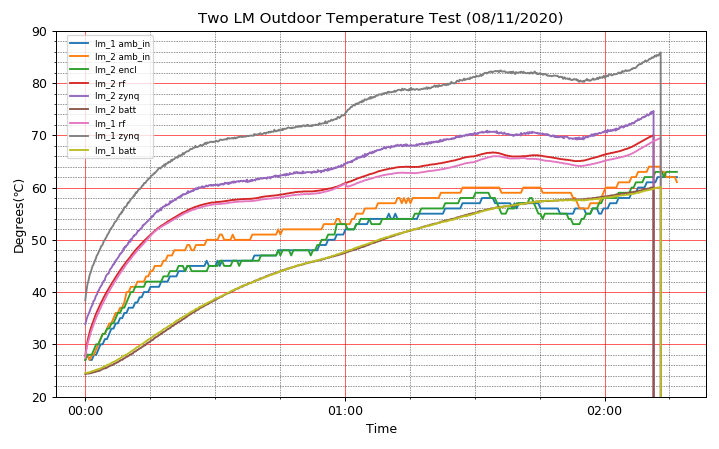

In [122]:
lm_1_amb_in_list = np.array(lm_1_amb_in_list)
lm_1_encl_list = np.array(lm_1_encl_list)
lm_2_amb_in_list = np.array(lm_2_amb_in_list)
lm_2_encl_list = np.array(lm_2_encl_list)

lm_2_rf_list = np.array(lm_2_rf_list)
lm_2_zynq_list = np.array(lm_2_zynq_list)
lm_2_batt_list = np.array(lm_2_batt_list)

lm_1_rf_list = np.array(lm_1_rf_list)
lm_1_zynq_list = np.array(lm_1_zynq_list)
lm_1_batt_list = np.array(lm_1_batt_list)

zeros_1 = np.zeros(np.size(lm_1_amb_in_list)-np.size(lm_2_rf_list))
zeros_2 = np.zeros(np.size(lm_1_amb_in_list)-np.size(lm_1_rf_list))
zero_array_1 = np.array(zeros_1)
zero_array_2 = np.array(zeros_2)

lm_2_rf_list = np.append(lm_2_rf_list, zero_array_1)
lm_2_zynq_list = np.append(lm_2_zynq_list, zero_array_1)
lm_2_batt_list = np.append(lm_2_batt_list, zero_array_1)

lm_1_rf_list = np.append(lm_1_rf_list, zero_array_2)
lm_1_zynq_list = np.append(lm_1_zynq_list, zero_array_2)
lm_1_batt_list = np.append(lm_1_batt_list, zero_array_2)

# time_axis = pd.read_excel(r"temp_data.xlsx", index_col=None, na_values=['NA'], usecols = "J", nrows = 8805)
# time_axis = np.array(time_axis)
# time_axis = time_axis.flatten()

# start = time(0, 0, 0)
# delta = timedelta(seconds=1)
# times = []
# n=8805

# for i in range(n):
#     # use complete datetime object, not only time
#     dt = datetime.combine(date.today(), time(0, 0)) + delta * i
#     times.append(dt)
    
times = np.arange('2020-08-11T00:00:00', '2020-08-11T02:16:44', dtype='datetime64[s]')  

# print(type(time_axis[0,0]))
# time_axis = datetime.datetime.strftime(time_axis)
# time_axis = dates.date2num(list(time_axis))
# print(np.shape(time_axis))
# print(time_axis) 
# print(type(time_axis))    
fig, ax = plt.subplots()
pd.plotting.register_matplotlib_converters()
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
plt.ylabel("Degrees(℃)")
plt.xlabel('Time')
plt.ylim(20,90)
plt.title('Two LM Outdoor Temperature Test (08/11/2020)') 
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.plot(times, lm_1_amb_in_list, label="lm_1 amb_in",linewidth=1.5)
# plt.plot(times, lm_1_encl_list, label="lm_1 encl_list", linewidth=1.5)
plt.plot(times, lm_2_amb_in_list, label="lm_2 amb_in", linewidth=1.5)
plt.plot(times, lm_2_encl_list, label="lm_2 encl", linewidth=1.5)
plt.plot(times, lm_2_rf_list, label="lm_2 rf", linewidth=1.5)
plt.plot(times, lm_2_zynq_list, label="lm_2 zynq", linewidth=1.5)
plt.plot(times, lm_2_batt_list, label="lm_2 batt", linewidth=1.5)
plt.plot(times, lm_1_rf_list, label="lm_1 rf", linewidth=1.5)
plt.plot(times, lm_1_zynq_list, label="lm_1 zynq", linewidth=1.5)
plt.plot(times, lm_1_batt_list, label="lm_1 batt", linewidth=1.5)

# Get only the month to show in the x-axis:
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# plt.setp(ax.get_xticklabels(), rotation = 15) 
# plt.gca().xaxis.set_major_locator(mdates.HourLocator())
# plt.plot(time_axis, batt_therm_list, label="battery thermistor")
# plt.plot(time_axis, amb_in_list, label="ambient thermistor in LM")
# plt.plot(time_axis, amb_out_list, label="ambient thermistor outside LM")
# plt.plot(time_axis, rf_list, label="firmware rf readings")
# plt.plot(time_axis, batt_list, label="firmware battery readings")
# plt.plot(time_axis, zynq_list, label="firmware zynq readings")

# xlocator = time_axis.MinuteLocator(byminute=[0,15,30,45], interval = 1)

plt.legend(bbox_to_anchor=(0.01, 1.0), loc='upper left', prop={"size":7})
plt.tight_layout()
plt.savefig("two_lm_outdoor_temperature_test_08_11_2020")


In [13]:
print(time_axis[1])
print(np.shape(time_axis))

00:00:02
(8805,)


In [39]:
start = time(0, 0, 0)
delta = timedelta(seconds=1)
times = []
n=8870

for i in range(n):
    # use complete datetime object, not only time
    dt = datetime.combine(date.today(), time(0, 0)) + delta * i
    times.append(dt)
    
print(times)    

[datetime.datetime(2020, 7, 31, 0, 0), datetime.datetime(2020, 7, 31, 0, 0, 1), datetime.datetime(2020, 7, 31, 0, 0, 2), datetime.datetime(2020, 7, 31, 0, 0, 3), datetime.datetime(2020, 7, 31, 0, 0, 4), datetime.datetime(2020, 7, 31, 0, 0, 5), datetime.datetime(2020, 7, 31, 0, 0, 6), datetime.datetime(2020, 7, 31, 0, 0, 7), datetime.datetime(2020, 7, 31, 0, 0, 8), datetime.datetime(2020, 7, 31, 0, 0, 9), datetime.datetime(2020, 7, 31, 0, 0, 10), datetime.datetime(2020, 7, 31, 0, 0, 11), datetime.datetime(2020, 7, 31, 0, 0, 12), datetime.datetime(2020, 7, 31, 0, 0, 13), datetime.datetime(2020, 7, 31, 0, 0, 14), datetime.datetime(2020, 7, 31, 0, 0, 15), datetime.datetime(2020, 7, 31, 0, 0, 16), datetime.datetime(2020, 7, 31, 0, 0, 17), datetime.datetime(2020, 7, 31, 0, 0, 18), datetime.datetime(2020, 7, 31, 0, 0, 19), datetime.datetime(2020, 7, 31, 0, 0, 20), datetime.datetime(2020, 7, 31, 0, 0, 21), datetime.datetime(2020, 7, 31, 0, 0, 22), datetime.datetime(2020, 7, 31, 0, 0, 23), date

In [20]:
t = np.arange('2020-08-11T00:00:00', '2020-08-11T00:00:10', dtype='datetime64[s]')            
print(t)

['2020-08-11T00:00:00' '2020-08-11T00:00:01' '2020-08-11T00:00:02'
 '2020-08-11T00:00:03' '2020-08-11T00:00:04' '2020-08-11T00:00:05'
 '2020-08-11T00:00:06' '2020-08-11T00:00:07' '2020-08-11T00:00:08'
 '2020-08-11T00:00:09']


In [69]:
print( datetime.strptime(exmatrix[x,2], '%m/%d/%Y %H:%M:%S').hour)

2


In [80]:
print(s1)
print(s2)
print(dt)

11
19
8


In [95]:
print(np.size(lm_2_rf_list))
print(np.size(lm_1_amb_in_list))
print(np.size(lm_1_rf_list))


8204
8204
8078


In [108]:
print(zeros_1)

[]


In [114]:
print(np.empty((1,3)))

[[-1.  1.  1.]]
